In [ ]:
# Load data from https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
# The given dataset contains images of a variety of fruits and vegetables, offering a rich source for developing and testing image recognition algorithms. The food items are categorized as follows:
# Fruits:
# Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango
# Vegetables:
# Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilly, Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant
# Given this dataset, your task is to create a machine learning model that can classify the images into two main categories: Fruits and Vegetables

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [8]:
# Load and Prepare the Dataset from https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:24<00:00, 86.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [16]:
# Define the path to the dataset
data = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8'

# Define image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Load the training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  data + '/train',
  labels='inferred',
  label_mode='categorical',
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  interpolation='nearest',
  batch_size=BATCH_SIZE,
  shuffle=True
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  data + '/validation',
  labels='inferred',
  label_mode='categorical',
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  interpolation='nearest',
  batch_size=BATCH_SIZE,
  shuffle=False
)

# Print the class names
class_names = train_ds.class_names
print("Class names:", class_names)

# Print the number of batches in the training dataset
print("Number of batches in training dataset:", tf.data.experimental.cardinality(train_ds).numpy())
print("Number of batches in validation dataset:", tf.data.experimental.cardinality(validation_ds).numpy())


# Take one batch from the training dataset and print the shape of images and labels
for images, labels in train_ds.take(1):
    print("Shape of images in one batch:", images.shape)
    print("Shape of labels in one batch:", labels.shape)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Class names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
Number of batches in training dataset: 98
Number of batches in validation dataset: 11
Shape of images in one batch: (32, 128, 128, 3)
Shape of labels in one batch: (32, 36)


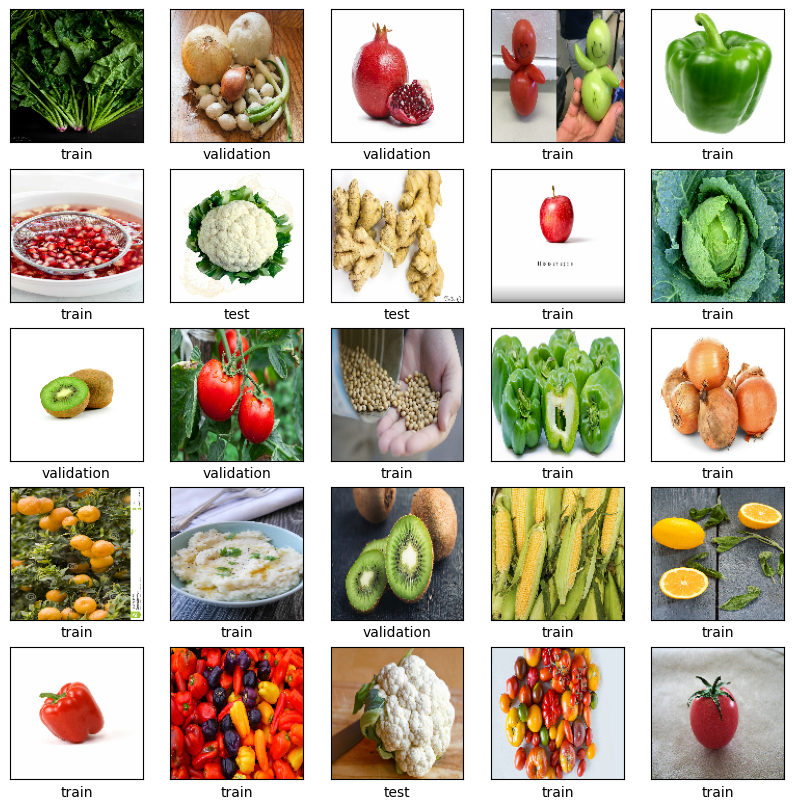

In [11]:
# Visualize the Data
plt.figure(figsize=(10,10))

# Get a batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    for i in range(min(25, images.shape[0])): # Display up to 25 images from the batch
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].numpy().astype("uint8"))
plt.show()

In [17]:
# Build the CNN Model

model = models.Sequential()
# Add an input layer to explicitly define the input shape
model.add(tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# First hidden layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Second hidden layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third hidden layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) # Add another pooling layer

# Flatten and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
# The output layer should have the number of units equal to the number of classes
model.add(layers.Dense(len(class_names), activation='softmax')) # Use softmax for multi-class classification

In [18]:
# Compile and Train the Model
# Specify an optimizer (e.g., Adam, SGD), a loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy) to monitor during training

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=10,
                    validation_data=validation_ds)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.0456 - loss: 18.6854

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 ━━━━━━━━━━━━━━━━━━━━ 89s 871ms/step - accuracy: 0.0456 - loss: 18.5697 - val_accuracy: 0.1111 - val_loss: 3.2499
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 880ms/step - accuracy: 0.0698 - loss: 3.4738 - val_accuracy: 0.0912 - val_loss: 3.4359
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 875ms/step - accuracy: 0.0880 - loss: 3.4463 - val_accuracy: 0.1453 - val_loss: 3.3823
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 840ms/step - accuracy: 0.1127 - loss: 3.3475 - val_accuracy: 0.1937 - val_loss: 3.2415
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 888ms/step - accuracy: 0.1941 - loss: 3.0600 - val_accuracy: 0.2137 - val_loss: 3.1418
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 141s 885ms/step - accuracy: 0.2638 - loss: 2.8126 - val_accuracy: 0.2821 - val_loss: 2.9217
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 138s 848ms/step - accuracy: 0.3292 - loss: 2.5886 - val_accuracy: 0.3419 - val_loss: 2.9526
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 145s 880ms/step - accuracy: 0.4006 - loss: 2.3798 - val_accurac

In [19]:
test_loss, test_acc = model.evaluate(validation_ds, verbose=2)
print(f'Validation accuracy: {test_acc}')

11/11 - 6s - 557ms/step - accuracy: 0.4843 - loss: 2.3969
Validation accuracy: 0.4843304753303528


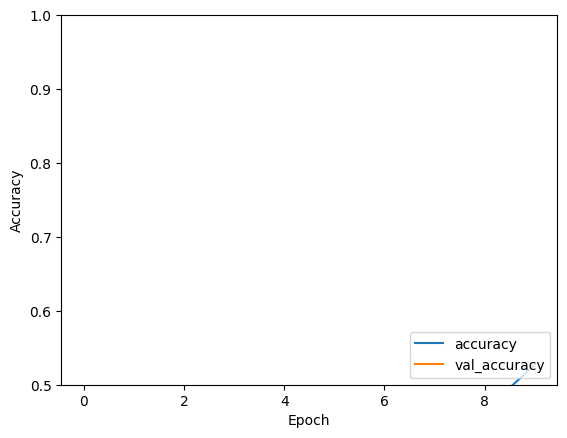

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()